In [1]:
import pandas as pd
import numpy as np

In [2]:
def parse_cardata():
    cardata = pd.read_csv('cardata.csv')
    return cardata

In [3]:
cardata = parse_cardata()
display(cardata.head())
print(type(cardata))

,first_name,last_name,age,company,gender,car,car_purchase_data
0,Bank,Benz,67,Flipkart,Male,Creta,7/7/2016
1,Livvy,McCrostie,53,Flipkart,Female,Creta,4/29/2019
2,Loydie,Charlet,61,Flipkart,Male,Swift Dzire,7/6/2018
3,Letti,De Clairmont,60,Microsoft,Female,i20,9/30/2017
4,Bili,Mebes,45,Flipkart,Female,Creta,6/7/2017


<class 'pandas.core.frame.DataFrame'>


In [4]:
cardata.columns


Index(['first_name', 'last_name', 'age', 'company', 'gender', 'car',
       'car_purchase_data'],
      dtype='object')

In [5]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   first_name         200 non-null    object
 1   last_name          200 non-null    object
 2   age                200 non-null    int64 
 3   company            200 non-null    object
 4   gender             200 non-null    object
 5   car                200 non-null    object
 6   car_purchase_data  200 non-null    object
dtypes: int64(1), object(6)
memory usage: 11.1+ KB


In [6]:
cardata.describe()

,age
count,200.000000
mean,53.430000
std,10.373192
min,35.000000
25%,45.000000
50%,54.500000
75%,62.000000
max,70.000000


In [7]:
cardata['age'].head()

0    67
1    53
2    61
3    60
4    45
Name: age, dtype: int64

In [8]:
print(cardata['age'].min())
print(cardata['age'].max())

35
70


In [9]:
bucket_size = 5
age_keys = []
for i in range(cardata['age'].min(), cardata['age'].max(), bucket_size):
    age_keys.append(str(i)+'-'+str(i+bucket_size))
age_keys

['35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70']

In [10]:
cars_keys = []
for car in cardata['car']:
    if car not in cars_keys:
        cars_keys.append(car)
cars_keys

['Creta', 'Swift Dzire', 'i20', 'Alto 800', 'Baleno']

In [11]:
cardata.drop_duplicates(subset=['car'], keep='last')

,first_name,last_name,age,company,gender,car,car_purchase_data
181,Rocky,Tallet,69,Google,Male,i20,10/24/2017
192,Jamil,Blenkensop,45,Google,Male,Swift Dzire,1/21/2019
197,Bryn,Rannells,53,Zomato,Male,Creta,1/17/2019
198,Nicolette,Marcome,57,Flipkart,Female,Baleno,3/29/2019
199,Gilda,Clausner,38,Zomato,Female,Alto 800,8/19/2018


In [12]:
cardata['car'].unique()

array(['Creta', 'Swift Dzire', 'i20', 'Alto 800', 'Baleno'], dtype=object)

In [13]:
print(cars_keys)
print(age_keys)

['Creta', 'Swift Dzire', 'i20', 'Alto 800', 'Baleno']
['35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70']


In [14]:
def cars_vs_age(cardata,bucketsize=5):
    age_keys = []
    for i in range(cardata['age'].min(), cardata['age'].max(), bucketsize):
        age_keys.append(str(i)+'-'+str(i+bucketsize))
    cars_keys = []
    for car in cardata['car']:
        if car not in cars_keys:
            cars_keys.append(car)
    histogram ={}
    for car in cars_keys:
        if car not in histogram:
            histogram[car] = {}
        for ag1 in age_keys:
            histogram[car][ag1] = 0
            ag = ag1.split('-')
            min_age = int(ag[0])
            max_age = int(ag[1])
            histogram[car][ag1] = int(np.sum((cardata['age']>= min_age) & (cardata['age']<max_age) & (cardata['car'] == car)))
            #print(int(np.sum((cardata['age']>= min_age) & (cardata['age']<max_age) & (cardata['car'] == car))))
            #print(type(np.sum((cardata['age']>= min_age) & (cardata['age']<max_age) & (cardata['car'] == car))))
                
    return histogram

In [15]:
histogram = cars_vs_age(cardata,5)
print(histogram)

{'Creta': {'35-40': 6, '40-45': 2, '45-50': 7, '50-55': 4, '55-60': 4, '60-65': 3, '65-70': 8}, 'Swift Dzire': {'35-40': 5, '40-45': 6, '45-50': 8, '50-55': 7, '55-60': 7, '60-65': 11, '65-70': 6}, 'i20': {'35-40': 5, '40-45': 6, '45-50': 4, '50-55': 5, '55-60': 6, '60-65': 3, '65-70': 8}, 'Alto 800': {'35-40': 4, '40-45': 4, '45-50': 5, '50-55': 3, '55-60': 7, '60-65': 6, '65-70': 6}, 'Baleno': {'35-40': 5, '40-45': 4, '45-50': 6, '50-55': 4, '55-60': 10, '60-65': 6, '65-70': 5}}


<BarContainer object of 7 artists>

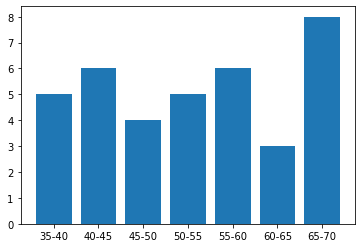

In [16]:
import matplotlib.pyplot as plt
plt.bar(histogram['i20'].keys(), histogram['i20'].values())

In [17]:
def age_vs_cars(cardata,bucketsize=5):
    age_keys = []
    for i in range(cardata['age'].min(), cardata['age'].max(), bucketsize):
        age_keys.append(str(i)+'-'+str(i+bucketsize))
    cars_keys = []
    for car in cardata['car']:
        if car not in cars_keys:
            cars_keys.append(car)
    histogram ={}
    for ag1 in age_keys:
        if ag1 not in histogram:
            histogram[ag1] = {}
        for car in cars_keys:
            histogram[ag1][car] = 0
            ag = ag1.split('-')
            min_age = int(ag[0])
            max_age = int(ag[1])
            histogram[ag1][car] = int(np.sum((cardata['age']>= min_age) & (cardata['age']<max_age) & (cardata['car'] == car)))
            #print(int(np.sum((cardata['age']>= min_age) & (cardata['age']<max_age) & (cardata['car'] == car))))
            #print(type(np.sum((cardata['age']>= min_age) & (cardata['age']<max_age) & (cardata['car'] == car))))
    print(histogram)            
    return histogram

In [18]:
hist = age_vs_cars(cardata,5    cars_keys = []
    for car in cardata['car']:
        if car not in cars_keys:
            cars_keys.append(car))

SyntaxError: invalid syntax (<ipython-input-18-5fd4ec6ef899>, line 1)

In [ ]:
print(hist)
print(histogram)

In [ ]:
bucketsize=5
age_keys = []
for i in range(cardata['age'].min(), cardata['age'].max(), bucketsize):
    age_keys.append(str(i)+'-'+str(i+bucketsize))

cars_keys = []
for car in cardata['car']:
    if car not in cars_keys:
        cars_keys.append(car)
new_hist = {}
for i in age_keys:
    new_hist[i] = {}
    for car in cars_keys:
        new_hist[i][car] = histogram[car][i]
print(new_hist)

In [19]:
print(hist)

NameError: name 'hist' is not defined

In [20]:
def company_vs_cars(cardata):
    company_vs_cars_map ={}
    car_names = []
    car_n = []
    uniq_comp= cardata['company'].unique()
    for company in uniq_comp:
        company_vs_cars_map[company] = []
        uniq_cars = cardata['car'].unique()
        for car in uniq_cars:
            car_no = int(np.sum((cardata['car'] == car) & (cardata['company'] == company)))
            company_vs_cars_map[company].append((car, car_no))
        company_vs_cars_map[company].sort(key = lambda x: x[1], reverse=True)
            
    print(company_vs_cars_map)
    return company_vs_cars_map
company_vs_cars_map = company_vs_cars(cardata)

{'Flipkart': [('i20', 14), ('Alto 800', 13), ('Swift Dzire', 12), ('Baleno', 9), ('Creta', 8)], 'Microsoft': [('Swift Dzire', 17), ('Baleno', 14), ('i20', 13), ('Creta', 7), ('Alto 800', 6)], 'Zomato': [('Baleno', 11), ('Creta', 10), ('Alto 800', 9), ('Swift Dzire', 7), ('i20', 6)], 'Google': [('Swift Dzire', 14), ('Creta', 9), ('Alto 800', 9), ('i20', 6), ('Baleno', 6)]}


In [21]:
for company in cardata['company'].unique():
    print(company_vs_cars_map[company][0][0:1])

('i20',)
('Swift Dzire',)
('Baleno',)
('Swift Dzire',)


In [22]:
car_points = {}
for car in cardata['car'].unique():
    car_points[car] = 0
    for company in cardata['company'].unique():
        print(company_vs_cars_map[company][i][0] for i in range(2))
        #if car in company_vs_cars_map[company][0:2]:

print(car_points)

<generator object <genexpr> at 0x7fcc9dd7deb0>
<generator object <genexpr> at 0x7fcc9dd7deb0>
<generator object <genexpr> at 0x7fcc9dd7deb0>
<generator object <genexpr> at 0x7fcc9dd7deb0>
<generator object <genexpr> at 0x7fcc9dd7deb0>
<generator object <genexpr> at 0x7fcc9dd7deb0>
<generator object <genexpr> at 0x7fcc9dd7deb0>
<generator object <genexpr> at 0x7fcc9dd7deb0>
<generator object <genexpr> at 0x7fcc9dd7deb0>
<generator object <genexpr> at 0x7fcc9dd7deb0>
<generator object <genexpr> at 0x7fcc9dd7deb0>
<generator object <genexpr> at 0x7fcc9dd7deb0>
<generator object <genexpr> at 0x7fcc9dd7deb0>
<generator object <genexpr> at 0x7fcc9dd7deb0>
<generator object <genexpr> at 0x7fcc9dd7deb0>
<generator object <genexpr> at 0x7fcc9dd7deb0>
<generator object <genexpr> at 0x7fcc9dd7deb0>
<generator object <genexpr> at 0x7fcc9dd7deb0>
<generator object <genexpr> at 0x7fcc9dd7deb0>
<generator object <genexpr> at 0x7fcc9dd7deb0>
{'Creta': 0, 'Swift Dzire': 0, 'i20': 0, 'Alto 800': 0, 'Bal

In [23]:
company_vs_cars_map

{'Flipkart': [('i20', 14),
  ('Alto 800', 13),
  ('Swift Dzire', 12),
  ('Baleno', 9),
  ('Creta', 8)],
 'Microsoft': [('Swift Dzire', 17),
  ('Baleno', 14),
  ('i20', 13),
  ('Creta', 7),
  ('Alto 800', 6)],
 'Zomato': [('Baleno', 11),
  ('Creta', 10),
  ('Alto 800', 9),
  ('Swift Dzire', 7),
  ('i20', 6)],
 'Google': [('Swift Dzire', 14),
  ('Creta', 9),
  ('Alto 800', 9),
  ('i20', 6),
  ('Baleno', 6)]}

In [27]:
uniq_cars = cardata['car'].unique()
uniq_comp = cardata['company'].unique()

In [32]:
car_points = {}
for car in uniq_cars:
    car_points[car] = 0
    for company in uniq_comp:
        if car in company_vs_cars_map[company][0:1][0][0]:
            car_points[car] +=1
            
    

i20
Swift Dzire
Baleno
Swift Dzire
i20
Swift Dzire
Baleno
Swift Dzire
i20
Swift Dzire
Baleno
Swift Dzire
i20
Swift Dzire
Baleno
Swift Dzire
i20
Swift Dzire
Baleno
Swift Dzire
